In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
import cv2

In [134]:
path = Path('~/Downloads/PetitAllegro_ref.mp4').expanduser()


In [135]:
video = cv2.VideoCapture(str(path))

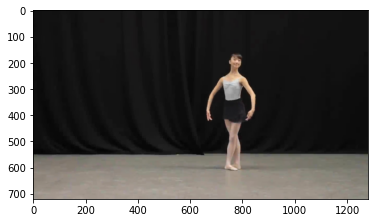

In [139]:
def show_frame(frame):
    # matplotlib expects img in RGB format but OpenCV provides it in BGR
    RGB_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_frame)

_,frame = video.read()
show_frame(frame)

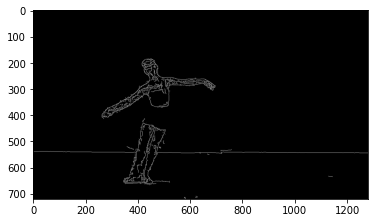

In [258]:
_,frame = video.read()
edged=cv2.Canny(frame,30,50)
show_frame(edged)

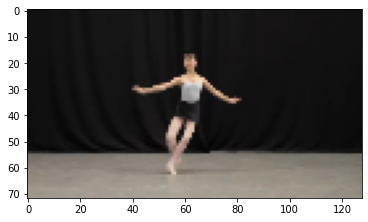

In [122]:
def resize_frame(frame):
    target_width = 128  # px
    scale_factor = target_width / frame.shape[1]
    width = int(frame.shape[1] * scale_factor)
    height = int(frame.shape[0] * scale_factor)

    # dsize
    dsize = (width, height)

    # resize image
    result = cv2.resize(frame, dsize)
    return result

_,frame = video.read()
resized = resize_frame(frame)
show_frame(resized)

In [131]:
path = Path('~/Downloads/PetitAllegro_ref.mp4').expanduser()
frames_path = (path.parent/f'{path.name}_frames')
frames_path.mkdir(exist_ok=True)
video = cv2.VideoCapture(str(path))
i = -1
while True:
    i += 1
    ok, frame = video.read()
    if not ok:
        break
    if i % 3 != 0:
        continue
    resized = resize_frame(frame)
    cv2.imwrite(str(frames_path/f'frame_{i//3:05d}.png'), resized)